# Exploratory Data Analysis

In [3]:
## import modules

import pandas as pd
import numpy as np

#set precision to 2 decimals...shouls be done when importing lib
pd.set_option("display.precision",2)


import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
sns.set(style="white")

In [4]:
## load data

Telco_churn = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# set seed for reproducibility

np.random.seed(0)

In [5]:
## read data to check for missing values

Telco_churn.head(10)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [6]:
# Check for if any missing values per column

missing_values_count = Telco_churn.isnull().sum()

#look at the # of missing points in all columns

missing_values_count[0:21]


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# check data dimention, feature names and data types

df= Telco_churn

df.shape

(7043, 21)

In [8]:
#check list of columns

df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
# check general info of dataframe 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
# decribe the numeric dataset for features, mean, st dev, range, median, quartiles and non-missing vales

df.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76
std,0.37,24.56,30.09
min,0.00,0.00,18.25
25%,0.00,9.00,35.50
50%,0.00,29.00,70.35
75%,0.00,55.00,89.85
max,1.00,72.00,118.75


In [11]:
# for non-numeric dataset 

df.describe(include=["object", "bool"])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [12]:
# for categorical (object) and boolean (bool type) distribution of Churn, value_counts method can be used

df["Churn"].value_counts()



Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [13]:
# 1869 are churned customers, 5174 are loyal customers. lets check these values in fractions or %

df["Churn"].value_counts(normalize = True)


Churn
No     0.73
Yes    0.27
Name: proportion, dtype: float64

Sorting

In [14]:
# Datafame can be sorted using tenure

df.sort_values(by ="tenure", ascending = False).head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1672,4737-AQCPU,Male,0,Yes,Yes,72,Yes,Yes,DSL,Yes,...,Yes,Yes,No,No,Two year,No,Credit card (automatic),72.1,5016.65,No
193,9680-NIAUV,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,No,Credit card (automatic),109.7,8129.3,No
4553,5914-XRFQB,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),115.8,8424.9,No
483,5168-MQQCA,Female,0,Yes,No,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),108.5,8003.8,No
3266,0464-WJTKO,Female,0,Yes,Yes,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.1,1460.85,No


In [15]:
# we can also sort by multiple columns


df.sort_values(by=["Churn", "tenure"], ascending=[True, False]).head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
28,5248-YGIJN,Male,0,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),90.25,6369.45,No
35,6234-RAAPL,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,No,Two year,No,Bank transfer (automatic),99.90,7251.7,No
59,5954-BDFSG,Female,0,No,No,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),107.50,7853.7,No
62,0526-SXDJP,Male,0,Yes,No,72,No,No phone service,DSL,Yes,...,Yes,No,No,No,Two year,No,Bank transfer (automatic),42.10,2962,No
94,9848-JQJTX,Male,0,No,No,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),100.90,7459.05,No


Indexing & Retrieving data

A DatFrame can be indexd in a few different ways.

Lets answer the question What is the proportion of churned users in our dataframe?
If its int dat type can use df.mean() but in our dataset churn is object (string) so will use value_counts method

In [16]:
df["Churn"].value_counts(normalize=True)

Churn
No     0.73
Yes    0.27
Name: proportion, dtype: float64

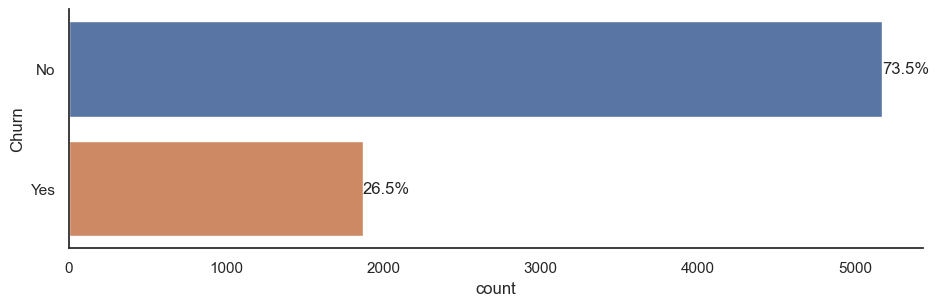

In [17]:
# Create the catplot
g = sns.catplot(y='Churn', kind='count', data=df, height=2.6, aspect=2.5, orient='h')

# Extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)  # or ax = g.axes.flat[0]

# Calculate the percentage values
total_count = len(df)
percentages = [(count / total_count) * 100 for count in df['Churn'].value_counts()]

# Add the percentage labels to the bars
ax.bar_label(ax.containers[0], labels=[f'{p:.1f}%' for p in percentages])

# Set plot size and adjust layout
g.fig.set_size_inches(10, 4)
g.fig.subplots_adjust(top=0.85)

# Show the plot
plt.show()

27% is a very bad churned rate for the company which can make the company go bankrupt.

What if we change datatype of all boolean columns containing Yes with 1 and No with 0

In [18]:
#Convert boolean columns to int datatype by ising list/lambda method

boolean_columns = ["PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup"
                  , "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Churn"]

# apply the lambda fnction in each boolean column listed and change datatype

for col in boolean_columns:
    df[col]= df[col].apply(lambda x:1 if x=='Yes' else 0).astype(int)

df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService      object
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int32
dtype: object

In [19]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,1,0,DSL,1,...,1,0,0,0,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,0,0,DSL,1,...,1,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,1


1. Service Usage pattern

Lets, check by each column,churned rates.

We can use Boolean indexing with one is very convinient. 

Syntax is df[P(df[name])], where P is a logical condition that check for each elements of name Column. the result consists of only rows that satisfy the P condition for name column. 

We can use alternate method df[df["Churn"]==1].mean() if Churn was in numerical column to Answer. However, our dataset contains object type columns so we can use lambda function to answer :

What are average values of numerical features for churned users?


In [20]:
# What are average values of numerical features for churned users?

columns = ["PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup"
                  , "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Churn"]

#filter rows where churn =1 

Churn_df= df[df['Churn']==1]

# apply the lambda fnction to check mean using churn column

mean_values= Churn_df[columns].apply(lambda col:col.mean())

mean_values

PhoneService        0.91
MultipleLines       0.45
OnlineSecurity      0.16
OnlineBackup        0.28
DeviceProtection    0.29
TechSupport         0.17
StreamingTV         0.44
StreamingMovies     0.44
Churn               1.00
dtype: float64

As analysed above, those who are using Phone Service has 91% churn rate.
Also, customers who are using multiple services are less compartively churn than those who didnt have muliple services. 
Especially, those using multiple services like Streaming TV or movies, having more churn rates compared to those who are using other services like online security, backup or tech support.

In [21]:
# what was Internet type of churned users?

# filter the column churn =1 

Churned_cust= df[df["Churn"]==1].copy()

# Get the counts of each contract type
Int_type = Churned_cust["InternetService"].value_counts()

# Print the contract types and their corresponding counts
Int_type


InternetService
Fiber optic    1297
DSL             459
No              113
Name: count, dtype: int64

In [22]:

Int_percentage = pd.crosstab(Churned_cust["Churn"], Churned_cust["InternetService"], normalize='all')

Int_percentage

InternetService,DSL,Fiber optic,No
Churn,,,
1,0.25,0.69,0.06


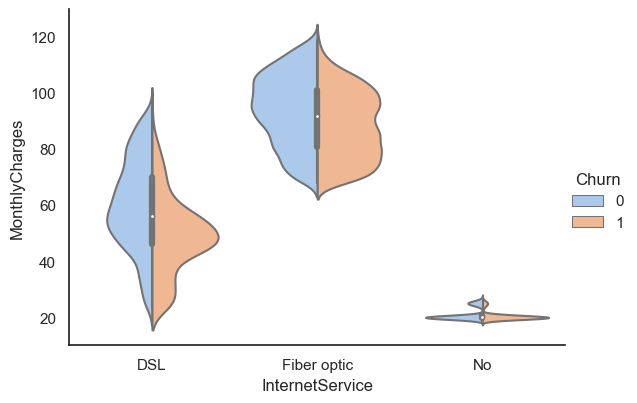

In [23]:
ax = sns.catplot(x="InternetService", y="MonthlyCharges", hue="Churn", kind="violin",
                 split=True, palette="pastel", data=df, height=4.2, aspect=1.4);

Above analysis indicates that (69%) customers with Fibre Optic internet service has high churn rate.

2. Contract Type & Length Impact

In [24]:
# What was avergae, min and max tenure of churned users?

Avg = df[df["Churn"]==1]["tenure"].mean()

Min = df[df["Churn"]==1]["tenure"].min()

Max = df[df["Churn"]==1]["tenure"].max()

print(f"Avg: {Avg} | Min: {Min} | Max: {Max}")



Avg: 17.979133226324237 | Min: 1 | Max: 72


Average tenure is 18 months, min 1 and max 72 months

<Axes: xlabel='tenure', ylabel='Churn'>

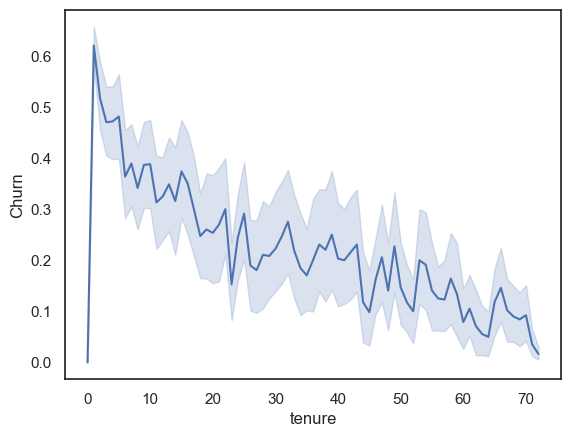

In [25]:
#What is effet of tenure has on churn rate ?


# Create a line plot
sns.lineplot(x='tenure', y='Churn', data=df)

This line chart indicates the churn rate is higher at early tenure indicating recent clinets having high churn rate.


3. Billing and Payment behaviour

In [26]:
# What was avergae, min and max monthly billing charges of churned users?

Avg = df[df["Churn"]==1]["MonthlyCharges"].mean()

Min = df[df["Churn"]==1]["MonthlyCharges"].min()

Max = df[df["Churn"]==1]["MonthlyCharges"].max()

print(f"Avg: {Avg} | Min: {Min} | Max: {Max}")

Avg: 74.44133226324237 | Min: 18.85 | Max: 118.35


In [30]:
# convert Total charges column (as it is a boolean data type with decimals in it)  type to float

#first identify any non-numeric values 

non_numeric_rows = df['TotalCharges'].str.isnumeric()
print(non_numeric_rows)


0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool


In [31]:
# convert any non-numeric to numeric values like nan or 0 

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Try converting column to float

df["TotalCharges"]= df["TotalCharges"].astype(float)

In [32]:
# What was avergae, min and max total billing charges of churned users?

Avg = df[df["Churn"]==1]["TotalCharges"].mean()

Min = df[df["Churn"]==1]["TotalCharges"].min()

Max = df[df["Churn"]==1]["TotalCharges"].max()

print(f"Avg: {Avg} | Min: {Min} | Max: {Max}")

Avg: 1531.7960941680042 | Min: 18.85 | Max: 8684.8


In [33]:
# lets check count of churned users using above conditions but with different total charges bins

# first filter churned column =1 

churned_cust= df[df["Churn"]==1].copy()

#average monthly bill

avg_mon_bill = churned_cust["MonthlyCharges"].mean()

#Average tenure

avg_tenure = churned_cust["tenure"].mean()


# Categorize total charges

charge_bins = [0, 3000, 6000, 8000, float("inf")]
charge_labels = ["0-3000", "3000-6000", "6000-8000", ">8000"]
churned_cust["TotalChargesRange"] = pd.cut(churned_cust["TotalCharges"], bins=charge_bins, labels=charge_labels)


# Count of users in each total charges range
total_charges_counts = churned_cust["TotalChargesRange"].value_counts()

# Print the results

print(f"Avg monthly bill: {avg_mon_bill:.2f}")
print(f"Avg tenure: {avg_tenure:.2f}")
print("Total charges counts by range:")
print(total_charges_counts)

Avg monthly bill: 74.44
Avg tenure: 17.98
Total charges counts by range:
TotalChargesRange
0-3000       1519
3000-6000     262
6000-8000      85
>8000           3
Name: count, dtype: int64


In [34]:
# some imports to set up plotting

import matplotlib.pyplot as plt
# pip install seaborn
import seaborn as sns

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

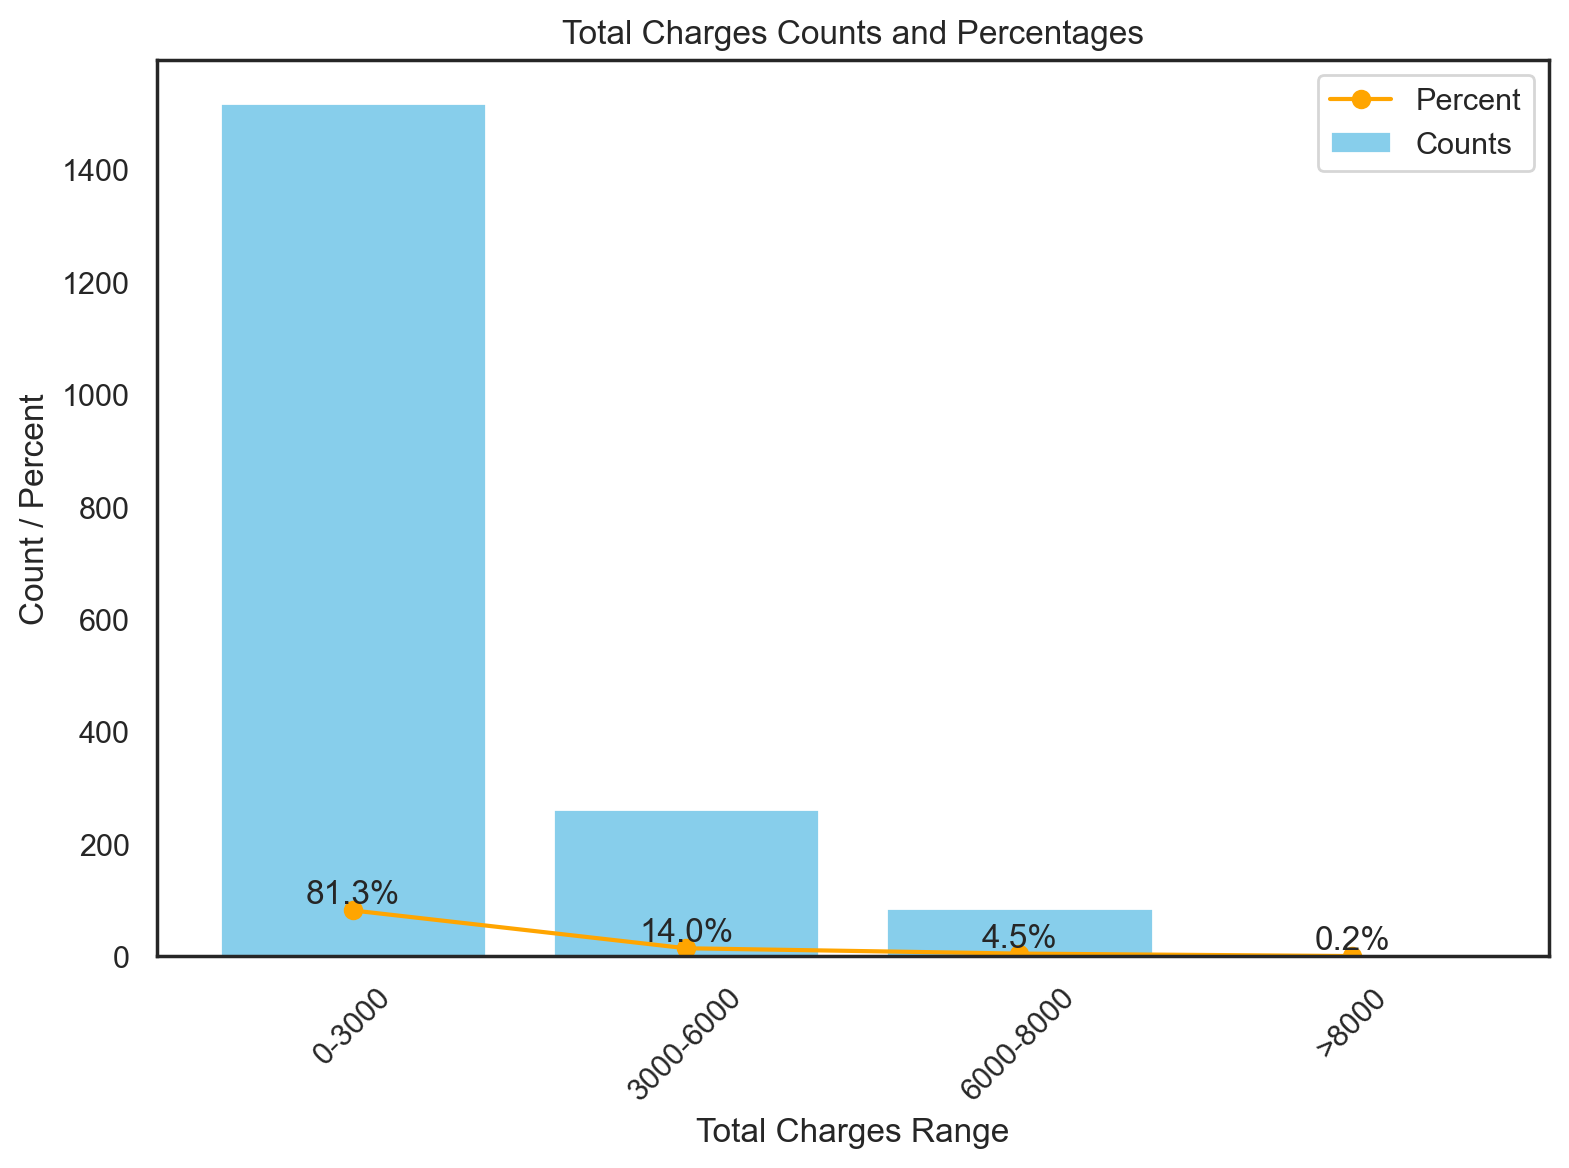

In [35]:
# Calculate percentages
total_charges_percent = (total_charges_counts / total_charges_counts.sum()) * 100

# Create a bar chart
plt.figure(figsize=(8, 6)) 
plt.bar(total_charges_counts.index, total_charges_counts.values, color="skyblue", label="Counts")
plt.plot(total_charges_counts.index, total_charges_percent, marker="o", color="orange", label="Percent")

# Add data labels (percentages)
for x, y in zip(total_charges_counts.index, total_charges_percent):
    plt.text(x, y, f"{y:.1f}%", ha="center", va="bottom")

# Customize the plot
plt.xlabel("Total Charges Range")
plt.ylabel("Count / Percent")
plt.title("Total Charges Counts and Percentages")
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [36]:
# Categorize monthly charges
# first filter churned column =1 

churned_cust= df[df["Churn"]==1].copy()

# categories the monthly bill ranges
charge_bins = [0, 25, 50, 75, 100, float("inf")]
charge_labels = ["0-25", "25-50", "50-75","75-100", ">75"]
churned_cust["MonthlyCharges"] = pd.cut(churned_cust["MonthlyCharges"], bins=charge_bins, labels=charge_labels)


# Count of users in each monthly charges range
monthly_charges_counts = churned_cust["MonthlyCharges"].value_counts()

# Print the results

print("Monthly charges counts by range:")
print(monthly_charges_counts)

Monthly charges counts by range:
MonthlyCharges
75-100    828
50-75     427
>75       253
25-50     234
0-25      127
Name: count, dtype: int64


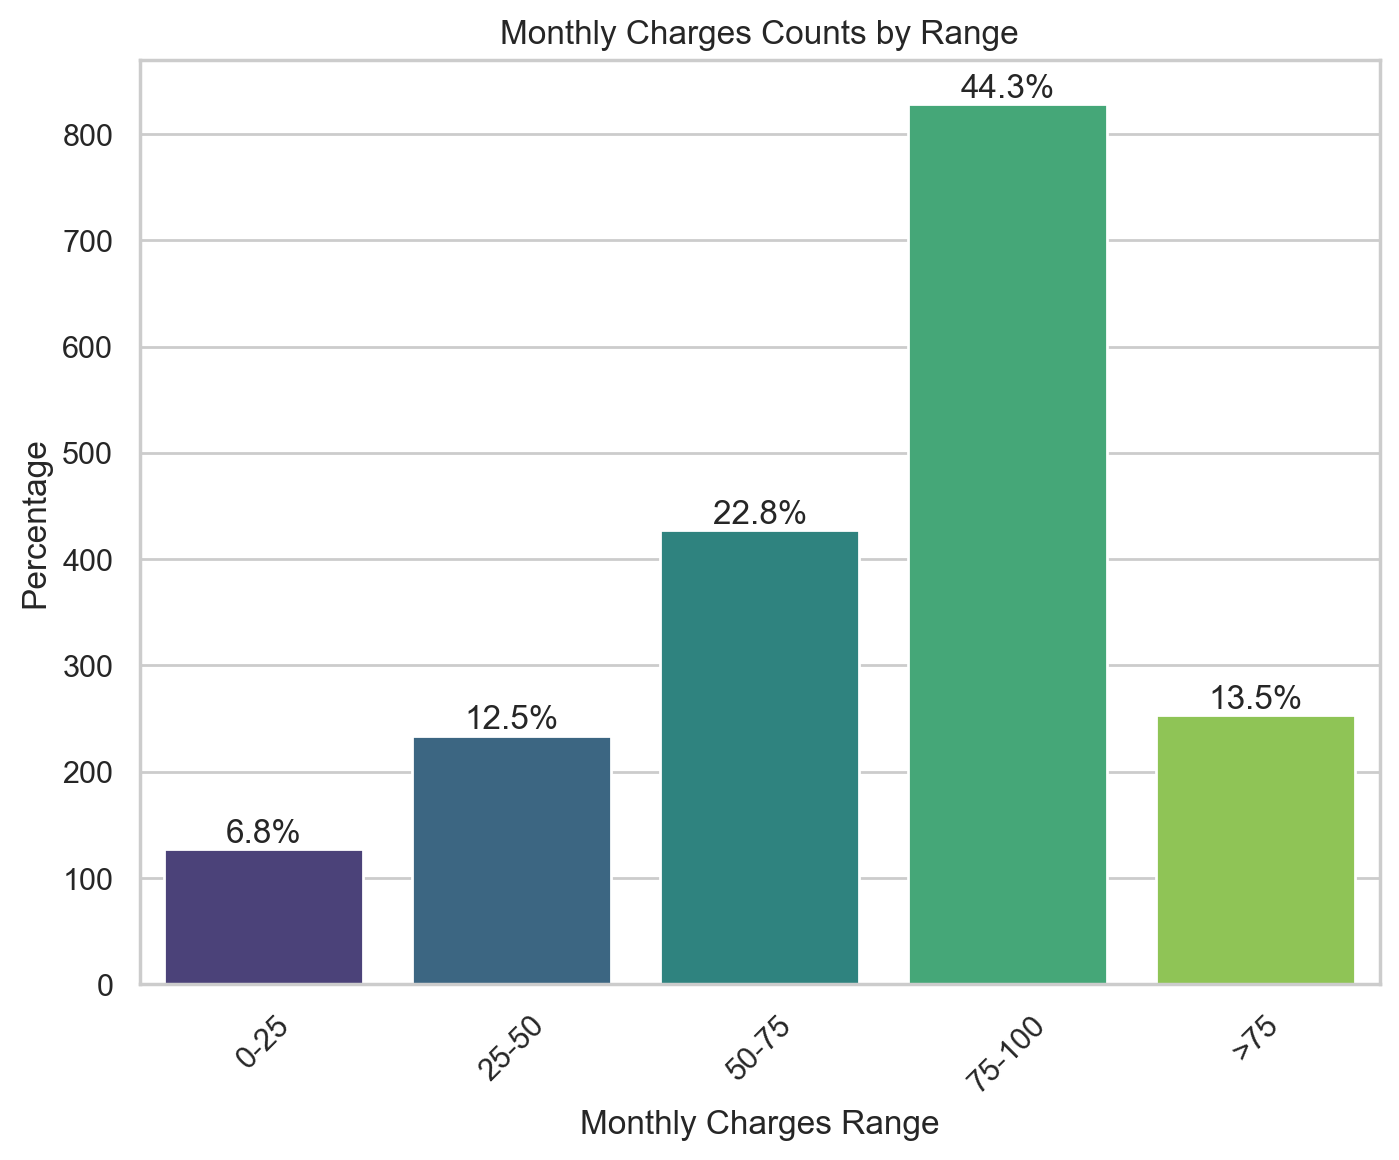

In [37]:

# Set seaborn style (optional but recommended)
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
ax = sns.barplot(x=monthly_charges_counts.index, y=monthly_charges_counts.values, palette="viridis")
ax.set(xlabel="Monthly Charges Range", ylabel="Percentage", title="Monthly Charges Counts by Range")

# Calculate the total count
total_count = monthly_charges_counts.sum()

# Calculate the percentage for each value
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height/total_count:.1%}", (p.get_x() + p.get_width() / 2., height),
                ha="center", va="bottom")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


Churned users with monthly bill ranges of 75-100 are high in numbers fowllowed by 50-75 monthly bill ranges.


<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

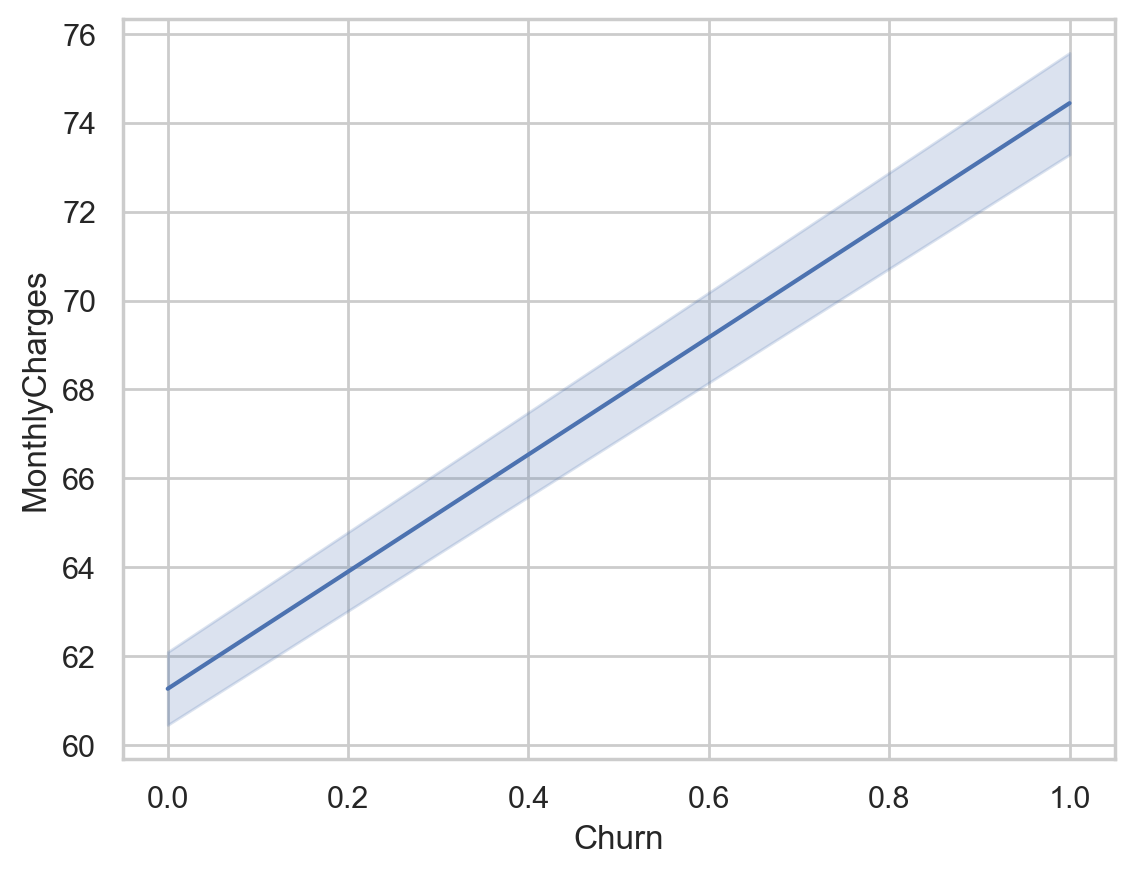

In [38]:
#What is effet of Monthly billing has on churn rate ?


# Create a line plot
sns.lineplot(x='Churn', y='MonthlyCharges', data=df)


<Axes: xlabel='Churn', ylabel='TotalCharges'>

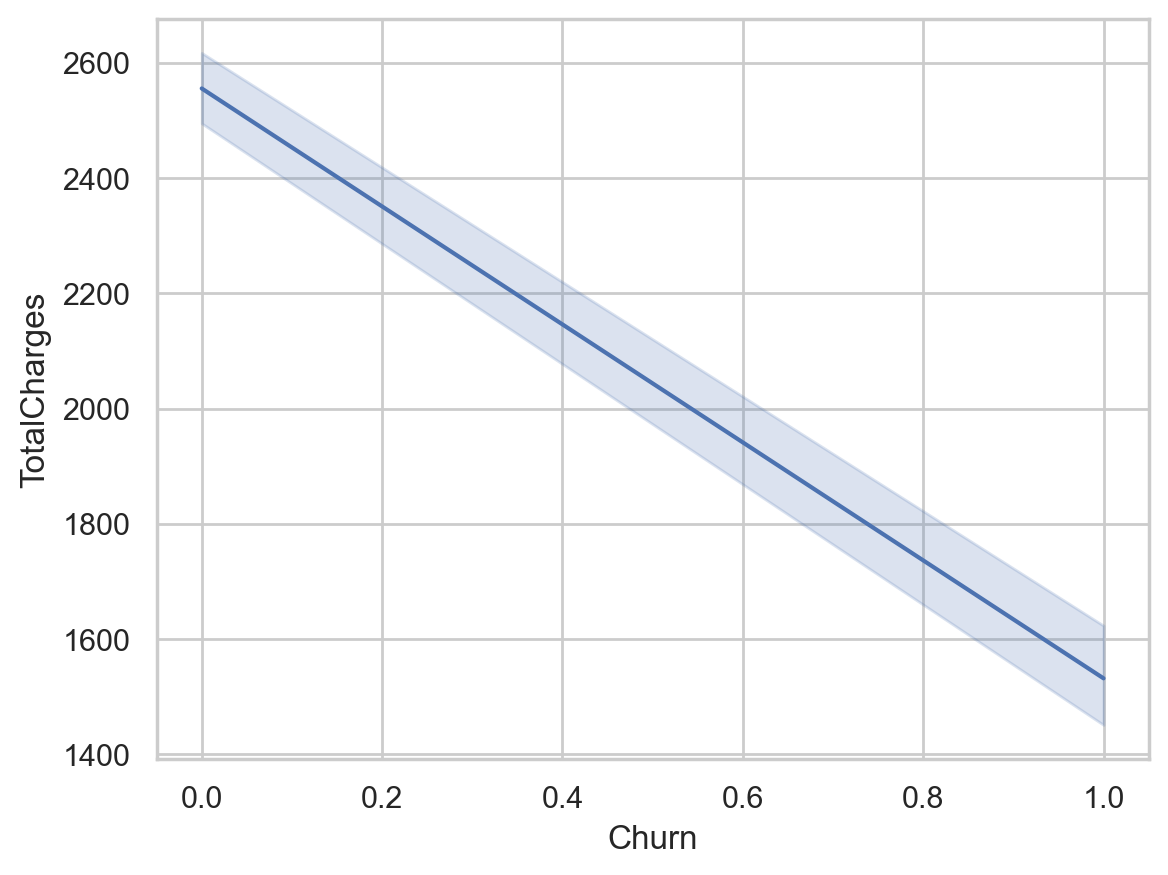

In [39]:
#What is effet of Total billing has on churn rate ?


# Create a line plot
sns.lineplot(x='Churn', y='TotalCharges', data=df)


Monthly billing is directly proportional to churn rate means as monthly charges increases, churn rate also increases. 
However, Total Charges are inverserly propotional to churn rate means at start the people having high total charges has not paid their monthly bills and more likely to churn.

In [47]:
#Payment method Impact on churn rate

df1 = df[df["Churn"]==1].copy()
result_count= pd.crosstab(df1["Churn"], df1["PaymentMethod"], margins=True)
result_count

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,All
Churn,,,,,
1,258,232,1071,308,1869
All,258,232,1071,308,1869


In [48]:
result_percentage = result_count= pd.crosstab(df1["Churn"], df1["PaymentMethod"], normalize='all')

result_percentage

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Churn,,,,
1,0.14,0.12,0.57,0.16


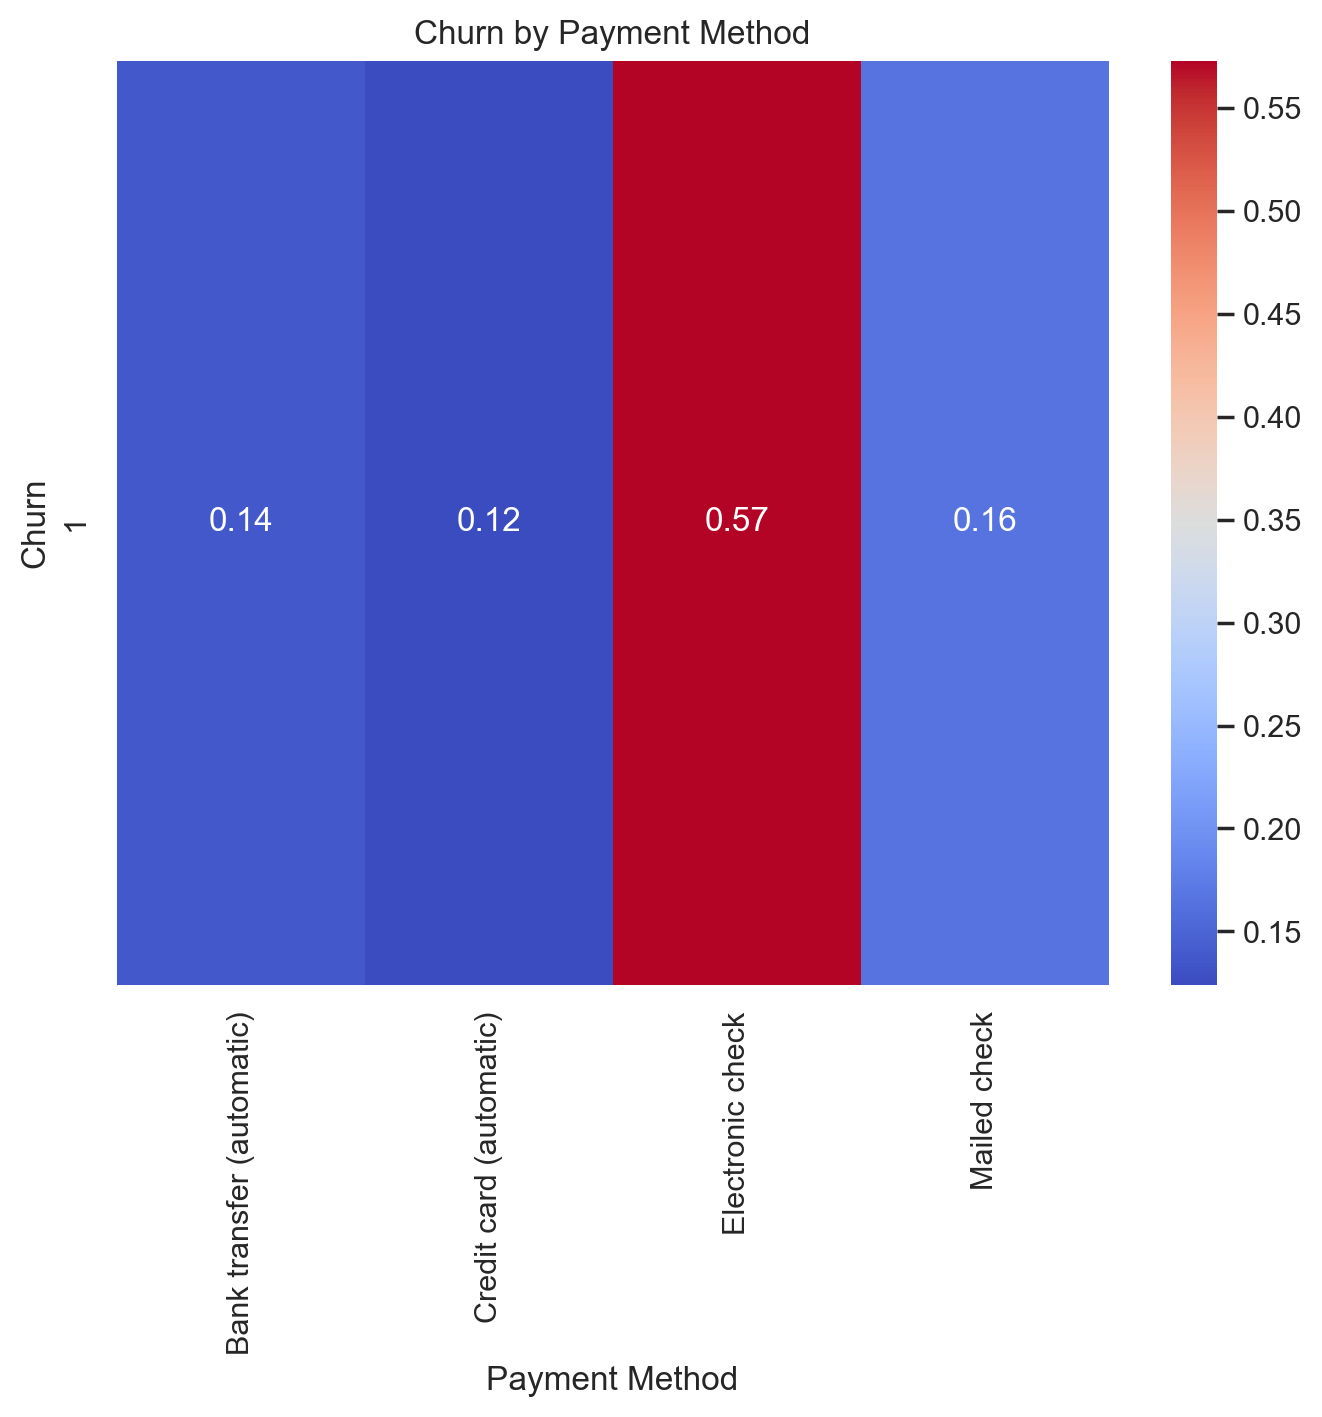

In [49]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(result_percentage, annot=True, cmap="coolwarm", cbar=True)
plt.title("Churn by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Churn")

# Show the plot
plt.show()

57% Churn users made payment using Electronic check are high in number compared those who used different payment methods.

In [99]:
pd.crosstab(index=df["PaymentMethod"], columns=df["Churn"], margins=True)

Churn,0,1,All
PaymentMethod,,,
Bank transfer (automatic),1286,258,1544
Credit card (automatic),1290,232,1522
Electronic check,1294,1071,2365
Mailed check,1304,308,1612
All,5174,1869,7043


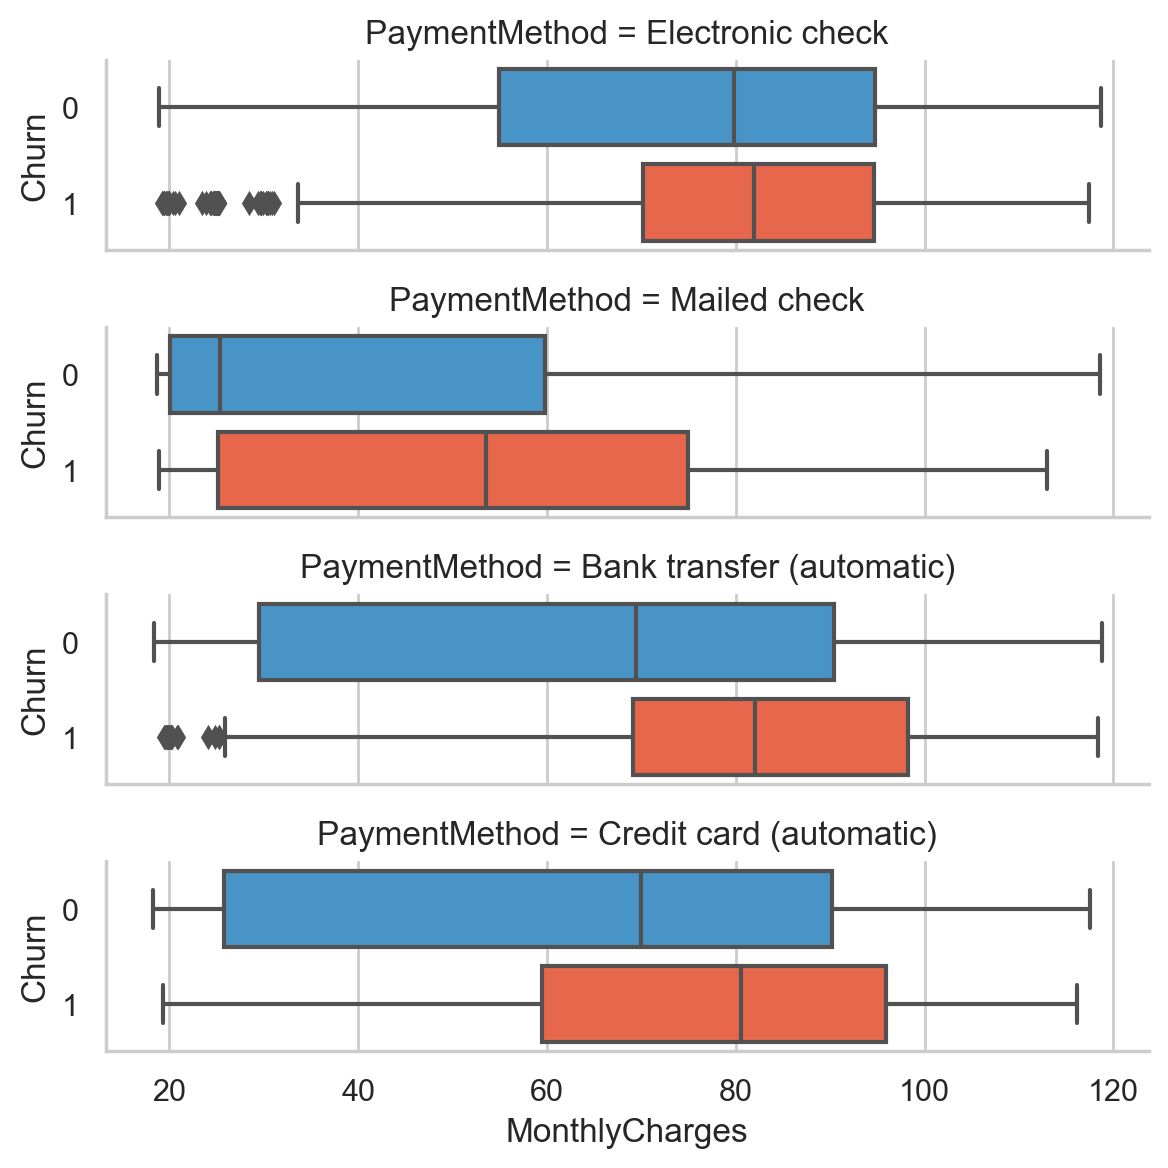

In [86]:
# Monthly charges vs Payment method vs churn 

# Set a custom color palette
sns.set_palette(['#3498DB', '#FF5733'])

sns.catplot(y="Churn", x="MonthlyCharges", row="PaymentMethod", kind="box", data=df, height=1.5, aspect=4, orient='h')

Interestingly, the customers paying with 'Mailed Check' even though they have less monthly charge and lower total charges still have less tenure compared to those paying with other methods. 
Interestingly, Customers with 'Electronic checks', Bank transfers, and 'Credit Cards' have an average monthly bill of 75/per month which is more than compared to mailed checks.

In [50]:
# list top customer 

df.apply(np.max)

customerID            9995-HOTOH
gender                      Male
SeniorCitizen                  1
Partner                      Yes
Dependents                   Yes
tenure                        72
PhoneService                   1
MultipleLines                  1
InternetService               No
OnlineSecurity                 1
OnlineBackup                   1
DeviceProtection               1
TechSupport                    1
StreamingTV                    1
StreamingMovies                1
Contract                Two year
PaperlessBilling             Yes
PaymentMethod       Mailed check
MonthlyCharges            118.75
TotalCharges              8684.8
Churn                          1
dtype: object

In [51]:
# List top customers with >8000 total charges

top_churned_cust = df[(df["TotalCharges"]>8000) & (df["Churn"]==1)].copy()

# sort ascending order

top_churned_cust.sort_values(by="TotalCharges", ascending=False, inplace=True)

top_churned_cust


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4610,2889-FPWRM,Male,0,Yes,No,72,1,1,Fiber optic,1,...,1,1,1,1,One year,Yes,Bank transfer (automatic),117.80,8684.8,1
1306,0201-OAMXR,Female,0,No,No,70,1,1,Fiber optic,1,...,1,1,1,1,One year,No,Credit card (automatic),115.55,8127.6,1
3890,3886-CERTZ,Female,0,Yes,No,72,1,1,Fiber optic,0,...,1,1,1,1,One year,Yes,Electronic check,109.25,8109.8,1


In [52]:
top_churned_cust.pivot_table(
    ["MonthlyCharges", "TotalCharges", "tenure"],
    ["Churn", "gender", "SeniorCitizen"],
    aggfunc="count",
)

MonthlyCharges  TotalCharges  tenure
Churn gender SeniorCitizen                                      
1     Female 0                           2             2       2
      Male   0                           1             1       1

In [55]:
# Does Billing method indicative of churn rate ?

#billing_count= pd.crosstab(df["Churn"], df["PaperlessBilling"], margins=True)

billing_percentage = pd.crosstab(df1["Churn"], df1["PaperlessBilling"], normalize='all')

billing_percentage


PaperlessBilling,No,Yes
Churn,,
1,0.25,0.75


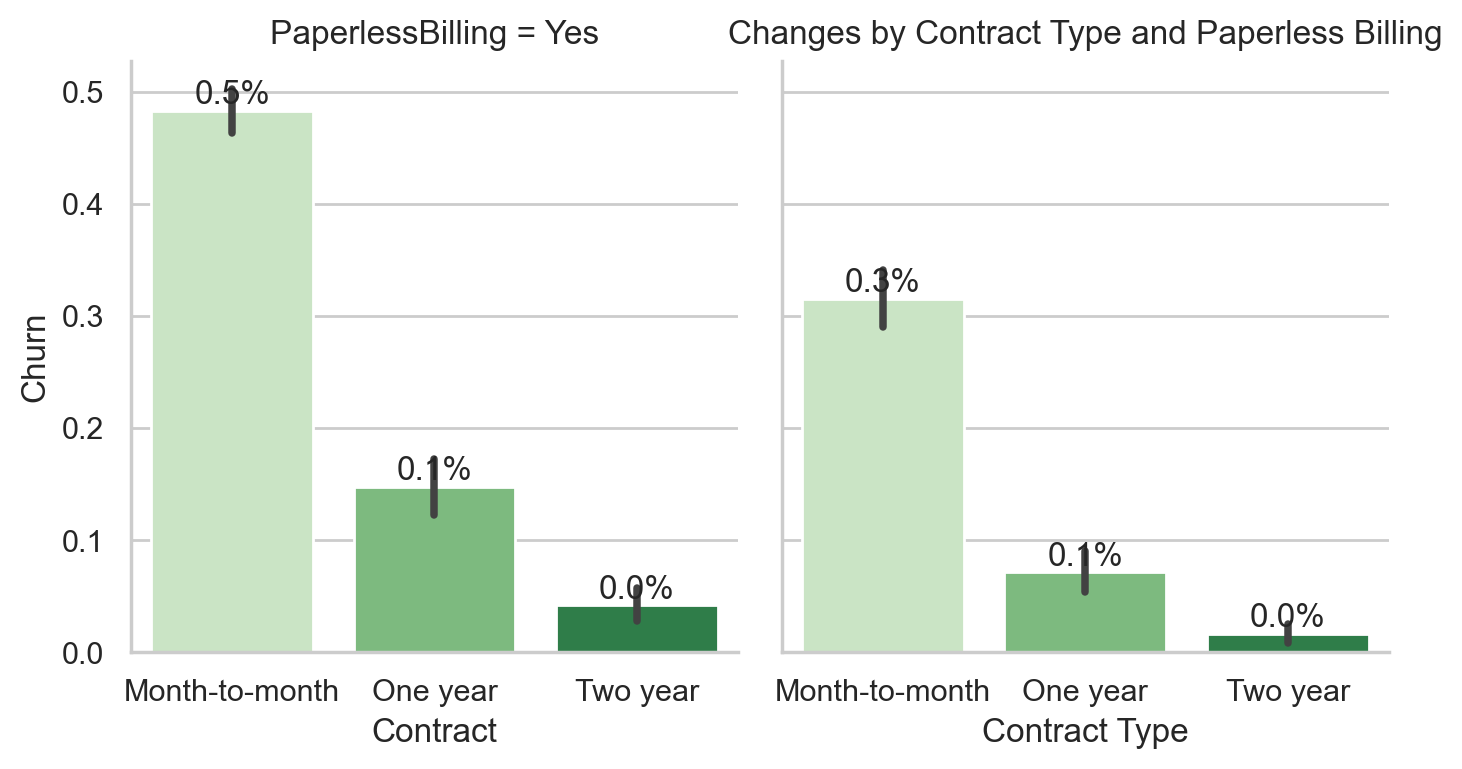

In [61]:
g = sns.FacetGrid(df, col="PaperlessBilling", height=4, aspect=.9)
g.map(sns.barplot, "Contract", "Churn", palette="Greens", order=['Month-to-month', 'One year', 'Two year'])

# Add labels and titles if needed
plt.xlabel("Contract Type")
plt.ylabel("Churn")
plt.title("Changes by Contract Type and Paperless Billing")

# Add percentage labels
for ax in g.axes.flat:
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height, f"{height:.1f}%", ha="center", va="bottom")

# Show the plot
plt.show()

75% of customers with Paperless billing indicated the higher churn rate.

4. Demographic Segmentation Analysis

In [62]:
# what is gender % of churned users?

gender= pd.crosstab(df["Churn"], df["gender"], normalize ="index")

# Display the percentages rounded to 2 decimal places
print(gender.round(2) * 100)


gender  Female  Male
Churn               
0         49.0  51.0
1         50.0  50.0


In [63]:
# Another way - what is gender count & % of churned users?

df1 = df[(df["Churn"]==1)].copy()

gender = pd.crosstab(df1["Churn"], df1["gender"], normalize ="index")

gender_counts = gender * len(df1)

# Display the percentages rounded to 2 decimal places
gender_counts_percentage = gender.round(2) * 100

print("Gender counts:", gender_counts)
print("Gender percentage:", gender_counts_percentage)


Gender counts: gender  Female   Male
Churn                
1        939.0  930.0
Gender percentage: gender  Female  Male
Churn               
1         50.0  50.0


Both male & female has equal churned rates . Now lets see if age makes any difference?

In [64]:
# what is elederly count & % of churned users?


elderly = pd.crosstab(df1["Churn"], df1["SeniorCitizen"], normalize ="index")

elderly_counts = elderly * len(df1)

# Display the percentages rounded to 2 decimal places
elderly_counts_percentage = elderly.round(2) * 100

print("counts:",elderly_counts)
print("percentage:", elderly_counts_percentage)


counts: SeniorCitizen       0      1
Churn                       
1              1393.0  476.0
percentage: SeniorCitizen     0     1
Churn                    
1              75.0  25.0


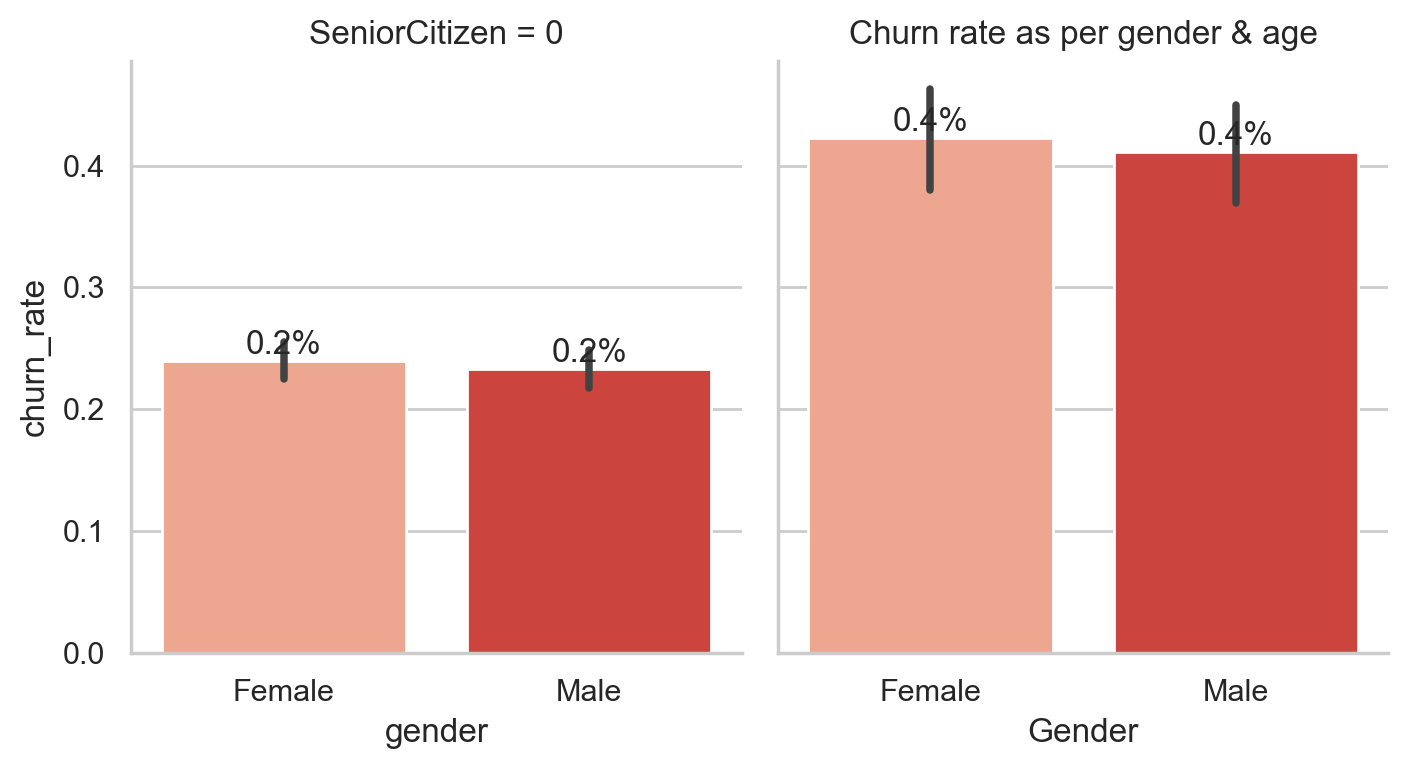

In [73]:
df['churn_rate'] = df['Churn'].replace("No", 0).replace("Yes", 1)
g = sns.FacetGrid(df, col="SeniorCitizen", height=4, aspect=.9)
ax = g.map(sns.barplot, "gender", "churn_rate", palette = "Reds", order= ['Female', 'Male'])

# Add labels and titles
plt.xlabel("Gender")
plt.ylabel("Churn")
plt.title("Churn rate as per gender & age")

# Add percentage labels
for ax in g.axes.flat:
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height, f"{height:.1f}%", ha="center", va="bottom")

# Show the plot
plt.show()

Above analysis indicates that Senior citizens are only 25% (476 nos) whereas its more of 75% non-elderly people (1393) who has more churned rate. Also, gender does not impact the churn rate. Now, lets see if having partner or dependent will it affect the churn rate

In [70]:
# what is count & % of churned users who has partner?


partner = pd.crosstab(df1["Churn"], df1["Partner"], normalize ="index")

partner_counts = partner * len(df1)

# Display the percentages rounded to 2 decimal places
partner_counts_percentage = partner.round(2) * 100

print("counts:",partner_counts)
print("percentage:", partner_counts_percentage)


counts: Partner      No    Yes
Churn                 
1        1200.0  669.0
percentage: Partner    No   Yes
Churn              
1        64.0  36.0


In [71]:
# what is count & % of churned users who has dependents?


dp = pd.crosstab(df1["Churn"], df1["Dependents"], normalize ="index")

dp_counts = dp * len(df1)

# Display the percentages rounded to 2 decimal places
dp_counts_percentage = dp.round(2) * 100

print("counts:",dp_counts)
print("percentage:", dp_counts_percentage)


counts: Dependents      No    Yes
Churn                    
1           1543.0  326.0
percentage: Dependents    No   Yes
Churn                 
1           83.0  17.0


Above analysis indicates that those who has no partners or dependents are having high churn rate from 65% to 83%.

Summary:

1. As analyzed, 27% of Customers churned which is the highest and a very bad rate which can make the company go bankrupt.
2. Young or non-elderly customers have a high rate.
3. The recent customers with tenure of 1-6 months are having churn rate of 20%-41%. This indicates that recent customers are more prone to churn.
4. Customers who have no partner and no dependents are showing the highest 60% churn rate followed by 22% of customers who don't have a partner.
5. Customers with just Phone Service have a 91% churn rate.  
6. Customers with Multiple lines are less likely to churn, especially, those having 'Online Security', 'Tech Support', and 'Online Backup'.
7. However, the customers having 'Streaming TV' & 'Streaming Movies' have had a 44% churn rate.
8. Customers having Fiber Optic internet have a 69% churn rate.
9. Customers having monthly bill charges of 75 or more per month show a high churn rate ranging from 44% to 58%.
10. However, Customers with 0-3000 total charges have the highest 81% of churn rate.
11. Customers who are paying using Electronic check are having 57% churn rate compared to other payment methods.
12.  Interestingly, the customers paying with 'Mailed Check' even though they have less monthly charge and lower total charges still have less tenure compared to those paying with other methods. Customers with 'Electronic checks', Bank transfers, and 'Credit Cards' have an average monthly bill of 75/per month which is more than compared to mailed checks.
13.  Also, customers having 'Month-to-month' contracts or short-term contracts are more likely to churn than those with one, two-year or long-term contracts.
14. The paperless billing method also shows an impact on the churn rate of customers.  Customers who have a paperless billing method have a 75% churn rate than those who don't have a paperless billing method. Also, those customers have an average monthly bill of 78/per month which is high compared to those with no paperless billing method.


In [97]:
# Export to Excel file
df.to_excel('telco_new.xlsx', index=False)
print('DataFrame exported to Excel file successfully.')

DataFrame exported to Excel file successfully.


In [98]:
# Export to CSV file
df.to_csv('telco_new1.csv', index=False)
print('DataFrame exported to CSV file successfully.')

DataFrame exported to CSV file successfully.
